# Hypothesis 1: Post-COVID Spatial Dispersion of Innovation
- We hypothesize that the geographic distribution of patent filings in the U.S. became more dispersed after the COVID-19 pandemic (2020–2021). 
- This may be due to increased remote work flexibility, allowing inventors to file from less traditional, non-urban tech hubs. We expect to observe more filings from rural or non-coastal counties in the post-2021 period.
- Datasets used here: ai_model_predictions.csv, g+inventor_disambiguated.tsv, g+location_disambiguated.tsv, g_application.tsv
- We received some suggestions to state the threshold value selection: so we calculated the average papents each year and then used that as the threshold for calculations
- We decided to approach it using graphs and statistical calculations.

- We used ChatGPT and Stack Overflow along with documentations from [https://www.geeksforgeeks.org/python-plotly-tutorial/] and [https://www.google.com/url?sa=t&source=web&rct=j&opi=89978449&url=https://plotly.com/python/getting-started/&ved=2ahUKEwiEqbnAsKONAxXXjIkEHQyRGpAQFnoECBoQAQ&usg=AOvVaw1mJED6uweZJlLxt7sGXcz8] and [https://www.google.com/url?sa=t&source=web&rct=j&opi=89978449&url=https://www.datacamp.com/tutorial/python-plotly-express-tutorial&ved=2ahUKEwiEqbnAsKONAxXXjIkEHQyRGpAQFnoECEcQAQ&usg=AOvVaw1mxneo8ymr1SG5IvWA-ZmC]

In [1]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
from shapely.geometry import Point
import plotly.express as px
from collections import Counter


# Import Files
- All files have been imported in the /Data folder using the data_preparation.py python notebook code.


In [2]:
ai_df = pd.read_csv("./Data/ai_model_predictions.csv")
inventor_df = pd.read_csv("./Data/g_inventor_disambiguated.tsv", sep="\t")
location_df = pd.read_csv("./Data/g_location_disambiguated.tsv", sep="\t")
application_df = pd.read_csv("./Data/g_application.tsv", sep="\t")

/var/folders/p9/bgpcjxgn0rz4pvkjs39ch9740000gn/T/ipykernel_80897/2729122210.py:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  ai_df = pd.read_csv("./Data/ai_model_predictions.csv")
/var/folders/p9/bgpcjxgn0rz4pvkjs39ch9740000gn/T/ipykernel_80897/2729122210.py:4: DtypeWarning: Columns (0,2,4) have mixed types. Specify dtype option on import or set low_memory=False.
  application_df = pd.read_csv("./Data/g_application.tsv", sep="\t")


In [3]:
ai_df = ai_df[ai_df["flag_patent"] == 1].copy()
ai_df["pub_dt"] = pd.to_datetime(ai_df["pub_dt"])
ai_df["year"] = ai_df["pub_dt"].dt.year

In [4]:
merged_df = pd.merge(ai_df, application_df, left_on='appl_id', right_on='application_id', how='left')
merged_df[-5:]

,doc_id,flag_patent,pub_dt,appl_id,predict50_any_ai,predict86_any_ai,predict93_any_ai,predict50_ml,predict86_ml,predict93_ml,...,predict86_hardware,predict93_hardware,ai_score_hardware,year,application_id,patent_id,patent_application_type,filing_date,series_code,rule_47_flag
7898398,RE49766,1,2023-12-26,16560513,0,0,0,0,0,0,...,0,0,0.000016,2023,16560513,RE49766,16,2019-09-04,16,0.0
7898399,RE49767,1,2023-12-26,17396023,1,1,1,0,0,0,...,0,0,0.000361,2023,17396023,RE49767,17,2021-08-06,17,0.0
7898400,RE49768,1,2023-12-26,16902934,0,0,0,0,0,0,...,0,0,0.000984,2023,16902934,RE49768,16,2020-06-16,16,0.0
7898401,RE49769,1,2023-12-26,16850934,1,1,1,0,0,0,...,0,0,0.001543,2023,16850934,RE49769,16,2020-04-16,16,0.0
7898402,RE49770,1,2023-12-26,17241197,0,0,0,0,0,0,...,0,0,0.001013,2023,17241197,RE49770,17,2021-04-27,17,0.0


In [5]:
merged_df.drop(columns=['appl_id'], inplace=True)
merged_df[:5]

,doc_id,flag_patent,pub_dt,predict50_any_ai,predict86_any_ai,predict93_any_ai,predict50_ml,predict86_ml,predict93_ml,ai_score_ml,...,predict86_hardware,predict93_hardware,ai_score_hardware,year,application_id,patent_id,patent_application_type,filing_date,series_code,rule_47_flag
0,10000000,1,2018-06-19,0,0,0,0,0,0,0.000036,...,0,0,0.001062,2018,14643719,10000000,14,2015-03-10,14,0.0
1,10000001,1,2018-06-19,0,0,0,0,0,0,0.000183,...,0,0,0.000073,2018,14962323,10000001,14,2015-12-08,14,0.0
2,10000002,1,2018-06-19,1,1,1,0,0,0,0.000987,...,0,0,0.000369,2018,15107519,10000002,15,2014-12-30,15,0.0
3,10000003,1,2018-06-19,0,0,0,0,0,0,0.000066,...,0,0,0.000518,2018,14437961,10000003,14,2013-03-12,14,0.0
4,10000004,1,2018-06-19,0,0,0,0,0,0,0.000163,...,0,0,0.000068,2018,14973198,10000004,14,2015-12-17,14,0.0


In [6]:
#merge for getting location_id in this merged dataset using the inventor dataset
new_df = pd.merge(merged_df, inventor_df[['patent_id', 'location_id']], on='patent_id', how='left')
new_df[-5:]

,doc_id,flag_patent,pub_dt,predict50_any_ai,predict86_any_ai,predict93_any_ai,predict50_ml,predict86_ml,predict93_ml,ai_score_ml,...,predict93_hardware,ai_score_hardware,year,application_id,patent_id,patent_application_type,filing_date,series_code,rule_47_flag,location_id
18278673,RE49768,1,2023-12-26,0,0,0,0,0,0,0.000028,...,0,0.000984,2023,16902934,RE49768,16,2020-06-16,16,0.0,907f3ef5-16c8-11ed-9b5f-1234bde3cd05
18278674,RE49768,1,2023-12-26,0,0,0,0,0,0,0.000028,...,0,0.000984,2023,16902934,RE49768,16,2020-06-16,16,0.0,907f3ef5-16c8-11ed-9b5f-1234bde3cd05
18278675,RE49768,1,2023-12-26,0,0,0,0,0,0,0.000028,...,0,0.000984,2023,16902934,RE49768,16,2020-06-16,16,0.0,907f3ef5-16c8-11ed-9b5f-1234bde3cd05
18278676,RE49769,1,2023-12-26,1,1,1,0,0,0,0.000178,...,0,0.001543,2023,16850934,RE49769,16,2020-04-16,16,0.0,c1fc51de-16c7-11ed-9b5f-1234bde3cd05
18278677,RE49770,1,2023-12-26,0,0,0,0,0,0,0.000188,...,0,0.001013,2023,17241197,RE49770,17,2021-04-27,17,0.0,6e639a55-49af-11ed-9879-1234bde3cd05


In [7]:
new_merged_df = pd.merge(new_df, location_df, on='location_id', how='left')


In [8]:
new_merged_df[:5]

,doc_id,flag_patent,pub_dt,predict50_any_ai,predict86_any_ai,predict93_any_ai,predict50_ml,predict86_ml,predict93_ml,ai_score_ml,...,rule_47_flag,location_id,disambig_city,disambig_state,disambig_country,latitude,longitude,county,state_fips,county_fips
0,10000000,1,2018-06-19,0,0,0,0,0,0,0.000036,...,0.0,198b0471-16c8-11ed-9b5f-1234bde3cd05,Manhattan Beach,CA,US,33.891599,-118.395124,Los Angeles,6.0,37.0
1,10000001,1,2018-06-19,0,0,0,0,0,0,0.000183,...,0.0,3eb37495-16c8-11ed-9b5f-1234bde3cd05,Ansan-si,NaN,KR,37.321715,126.830860,NaN,NaN,NaN
2,10000001,1,2018-06-19,0,0,0,0,0,0,0.000183,...,0.0,6c4ba08f-16c8-11ed-9b5f-1234bde3cd05,Gunpo-si,NaN,KR,37.361523,126.934903,NaN,NaN,NaN
3,10000002,1,2018-06-19,1,1,1,0,0,0,0.000987,...,0.0,755a6338-16c8-11ed-9b5f-1234bde3cd05,Yongin-si,NaN,KR,37.240574,127.178557,NaN,NaN,NaN
4,10000002,1,2018-06-19,1,1,1,0,0,0,0.000987,...,0.0,755a6338-16c8-11ed-9b5f-1234bde3cd05,Yongin-si,NaN,KR,37.240574,127.178557,NaN,NaN,NaN


In [9]:
new_merged_df[-5:]

,doc_id,flag_patent,pub_dt,predict50_any_ai,predict86_any_ai,predict93_any_ai,predict50_ml,predict86_ml,predict93_ml,ai_score_ml,...,rule_47_flag,location_id,disambig_city,disambig_state,disambig_country,latitude,longitude,county,state_fips,county_fips
18278673,RE49768,1,2023-12-26,0,0,0,0,0,0,0.000028,...,0.0,907f3ef5-16c8-11ed-9b5f-1234bde3cd05,Taoyuan,NaN,TW,24.992999,121.301000,NaN,NaN,NaN
18278674,RE49768,1,2023-12-26,0,0,0,0,0,0,0.000028,...,0.0,907f3ef5-16c8-11ed-9b5f-1234bde3cd05,Taoyuan,NaN,TW,24.992999,121.301000,NaN,NaN,NaN
18278675,RE49768,1,2023-12-26,0,0,0,0,0,0,0.000028,...,0.0,907f3ef5-16c8-11ed-9b5f-1234bde3cd05,Taoyuan,NaN,TW,24.992999,121.301000,NaN,NaN,NaN
18278676,RE49769,1,2023-12-26,1,1,1,0,0,0,0.000178,...,0.0,c1fc51de-16c7-11ed-9b5f-1234bde3cd05,Encinitas,CA,US,33.036987,-117.291982,San Diego,6.0,73.0
18278677,RE49770,1,2023-12-26,0,0,0,0,0,0,0.000188,...,0.0,6e639a55-49af-11ed-9879-1234bde3cd05,Nam-dong,NaN,KR,37.224092,127.201236,NaN,NaN,NaN


In [10]:
df = new_merged_df[new_merged_df['disambig_country'] == 'US']
df.dropna(subset=["county","state_fips", "county_fips", "year"], inplace=True)

/var/folders/p9/bgpcjxgn0rz4pvkjs39ch9740000gn/T/ipykernel_80897/3921035098.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(subset=["county","state_fips", "county_fips", "year"], inplace=True)


In [11]:
df[:5]

,doc_id,flag_patent,pub_dt,predict50_any_ai,predict86_any_ai,predict93_any_ai,predict50_ml,predict86_ml,predict93_ml,ai_score_ml,...,rule_47_flag,location_id,disambig_city,disambig_state,disambig_country,latitude,longitude,county,state_fips,county_fips
0,10000000,1,2018-06-19,0,0,0,0,0,0,0.000036,...,0.0,198b0471-16c8-11ed-9b5f-1234bde3cd05,Manhattan Beach,CA,US,33.891599,-118.395124,Los Angeles,6.0,37.0
15,10000007,1,2018-06-19,0,0,0,0,0,0,0.000137,...,0.0,e8c44888-16c7-11ed-9b5f-1234bde3cd05,Brookfield,WI,US,43.057848,-88.126198,Waukesha,55.0,133.0
16,10000007,1,2018-06-19,0,0,0,0,0,0,0.000137,...,0.0,e0d46bcd-16c7-11ed-9b5f-1234bde3cd05,Grafton,WI,US,43.319727,-87.953423,Ozaukee,55.0,89.0
17,10000007,1,2018-06-19,0,0,0,0,0,0,0.000137,...,0.0,ea7e63b4-16c7-11ed-9b5f-1234bde3cd05,Cedarburg,WI,US,43.296655,-87.987535,Ozaukee,55.0,89.0
18,10000007,1,2018-06-19,0,0,0,0,0,0,0.000137,...,0.0,eba77012-16c7-11ed-9b5f-1234bde3cd05,West Allis,WI,US,43.016681,-88.007031,Milwaukee,55.0,79.0


In [12]:
df[-5:]

,doc_id,flag_patent,pub_dt,predict50_any_ai,predict86_any_ai,predict93_any_ai,predict50_ml,predict86_ml,predict93_ml,ai_score_ml,...,rule_47_flag,location_id,disambig_city,disambig_state,disambig_country,latitude,longitude,county,state_fips,county_fips
18278665,RE49765,1,2023-12-26,0,0,0,0,0,0,0.000181,...,0.0,ef60d2b3-16c7-11ed-9b5f-1234bde3cd05,Melbourne,FL,US,28.106471,-80.637151,Brevard,12.0,9.0
18278670,RE49767,1,2023-12-26,1,1,1,0,0,0,0.000031,...,0.0,1893009c-16c8-11ed-9b5f-1234bde3cd05,San Diego,CA,US,32.717420,-117.162773,San Diego,6.0,73.0
18278671,RE49767,1,2023-12-26,1,1,1,0,0,0,0.000031,...,0.0,06a6c203-16c8-11ed-9b5f-1234bde3cd05,Hollis,NH,US,42.743162,-71.591333,Hillsborough County,33.0,11.0
18278672,RE49767,1,2023-12-26,1,1,1,0,0,0,0.000031,...,0.0,0e1a2668-16c8-11ed-9b5f-1234bde3cd05,Merrimack,NH,US,42.865086,-71.493400,Hillsborough County,33.0,11.0
18278676,RE49769,1,2023-12-26,1,1,1,0,0,0,0.000178,...,0.0,c1fc51de-16c7-11ed-9b5f-1234bde3cd05,Encinitas,CA,US,33.036987,-117.291982,San Diego,6.0,73.0


In [13]:
df['state_fips'] = df['state_fips'].astype(int).astype(str).str.zfill(2)
df['county_fips'] = df['county_fips'].astype(int).astype(str).str.zfill(3)

/var/folders/p9/bgpcjxgn0rz4pvkjs39ch9740000gn/T/ipykernel_80897/4089402681.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['state_fips'] = df['state_fips'].astype(int).astype(str).str.zfill(2)
/var/folders/p9/bgpcjxgn0rz4pvkjs39ch9740000gn/T/ipykernel_80897/4089402681.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['county_fips'] = df['county_fips'].astype(int).astype(str).str.zfill(3)


In [14]:
df[-5:]

,doc_id,flag_patent,pub_dt,predict50_any_ai,predict86_any_ai,predict93_any_ai,predict50_ml,predict86_ml,predict93_ml,ai_score_ml,...,rule_47_flag,location_id,disambig_city,disambig_state,disambig_country,latitude,longitude,county,state_fips,county_fips
18278665,RE49765,1,2023-12-26,0,0,0,0,0,0,0.000181,...,0.0,ef60d2b3-16c7-11ed-9b5f-1234bde3cd05,Melbourne,FL,US,28.106471,-80.637151,Brevard,12,009
18278670,RE49767,1,2023-12-26,1,1,1,0,0,0,0.000031,...,0.0,1893009c-16c8-11ed-9b5f-1234bde3cd05,San Diego,CA,US,32.717420,-117.162773,San Diego,06,073
18278671,RE49767,1,2023-12-26,1,1,1,0,0,0,0.000031,...,0.0,06a6c203-16c8-11ed-9b5f-1234bde3cd05,Hollis,NH,US,42.743162,-71.591333,Hillsborough County,33,011
18278672,RE49767,1,2023-12-26,1,1,1,0,0,0,0.000031,...,0.0,0e1a2668-16c8-11ed-9b5f-1234bde3cd05,Merrimack,NH,US,42.865086,-71.493400,Hillsborough County,33,011
18278676,RE49769,1,2023-12-26,1,1,1,0,0,0,0.000178,...,0.0,c1fc51de-16c7-11ed-9b5f-1234bde3cd05,Encinitas,CA,US,33.036987,-117.291982,San Diego,06,073


In [15]:
print(df.columns.tolist())


['doc_id', 'flag_patent', 'pub_dt', 'predict50_any_ai', 'predict86_any_ai', 'predict93_any_ai', 'predict50_ml', 'predict86_ml', 'predict93_ml', 'ai_score_ml', 'predict50_evo', 'predict86_evo', 'predict93_evo', 'ai_score_evo', 'predict50_nlp', 'predict86_nlp', 'predict93_nlp', 'ai_score_nlp', 'predict50_speech', 'predict86_speech', 'predict93_speech', 'ai_score_speech', 'predict50_vision', 'predict86_vision', 'predict93_vision', 'ai_score_vision', 'predict50_planning', 'predict86_planning', 'predict93_planning', 'ai_score_planning', 'predict50_kr', 'predict86_kr', 'predict93_kr', 'ai_score_kr', 'predict50_hardware', 'predict86_hardware', 'predict93_hardware', 'ai_score_hardware', 'year', 'application_id', 'patent_id', 'patent_application_type', 'filing_date', 'series_code', 'rule_47_flag', 'location_id', 'disambig_city', 'disambig_state', 'disambig_country', 'latitude', 'longitude', 'county', 'state_fips', 'county_fips']


In [16]:
df_2018  = df[df['year'] == 2018].copy()
df_2018


,doc_id,flag_patent,pub_dt,predict50_any_ai,predict86_any_ai,predict93_any_ai,predict50_ml,predict86_ml,predict93_ml,ai_score_ml,...,rule_47_flag,location_id,disambig_city,disambig_state,disambig_country,latitude,longitude,county,state_fips,county_fips
0,10000000,1,2018-06-19,0,0,0,0,0,0,0.000036,...,0.0,198b0471-16c8-11ed-9b5f-1234bde3cd05,Manhattan Beach,CA,US,33.891599,-118.395124,Los Angeles,06,037
15,10000007,1,2018-06-19,0,0,0,0,0,0,0.000137,...,0.0,e8c44888-16c7-11ed-9b5f-1234bde3cd05,Brookfield,WI,US,43.057848,-88.126198,Waukesha,55,133
16,10000007,1,2018-06-19,0,0,0,0,0,0,0.000137,...,0.0,e0d46bcd-16c7-11ed-9b5f-1234bde3cd05,Grafton,WI,US,43.319727,-87.953423,Ozaukee,55,089
17,10000007,1,2018-06-19,0,0,0,0,0,0,0.000137,...,0.0,ea7e63b4-16c7-11ed-9b5f-1234bde3cd05,Cedarburg,WI,US,43.296655,-87.987535,Ozaukee,55,089
18,10000007,1,2018-06-19,0,0,0,0,0,0,0.000137,...,0.0,eba77012-16c7-11ed-9b5f-1234bde3cd05,West Allis,WI,US,43.016681,-88.007031,Milwaukee,55,079
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18271193,RE47177,1,2018-12-25,0,0,0,0,0,0,0.000537,...,0.0,c7e001c0-16c7-11ed-9b5f-1234bde3cd05,Los Altos Hills,CA,US,37.379663,-122.137464,Santa Clara,06,085
18271194,RE47178,1,2018-12-25,0,0,0,0,0,0,0.000089,...,0.0,02bfdd25-16c8-11ed-9b5f-1234bde3cd05,Charlottesville,VA,US,38.029306,-78.476678,Charlottesville (city),51,540
18271195,RE47178,1,2018-12-25,0,0,0,0,0,0,0.000089,...,0.0,02bfdd25-16c8-11ed-9b5f-1234bde3cd05,Charlottesville,VA,US,38.029306,-78.476678,Charlottesville (city),51,540
18271209,RE47182,1,2018-12-25,0,0,0,0,0,0,0.000291,...,0.0,c8ea0862-16c7-11ed-9b5f-1234bde3cd05,Plano,TX,US,33.013676,-96.692510,Collin,48,085


In [17]:
df_2022  = df[df['year'] == 2022].copy()
df_2022

,doc_id,flag_patent,pub_dt,predict50_any_ai,predict86_any_ai,predict93_any_ai,predict50_ml,predict86_ml,predict93_ml,ai_score_ml,...,rule_47_flag,location_id,disambig_city,disambig_state,disambig_country,latitude,longitude,county,state_fips,county_fips
3572841,11212952,1,2022-01-04,0,0,0,0,0,0,0.000160,...,0.0,f69d8c9b-16c7-11ed-9b5f-1234bde3cd05,Statesboro,GA,US,32.449014,-81.783291,Bulloch,13,031
3572842,11212953,1,2022-01-04,1,0,0,0,0,0,0.000265,...,0.0,cca4eec9-16c7-11ed-9b5f-1234bde3cd05,Geneseo,IL,US,41.452517,-90.154836,Henry,17,073
3572843,11212953,1,2022-01-04,1,0,0,0,0,0,0.000265,...,0.0,cca4eec9-16c7-11ed-9b5f-1234bde3cd05,Geneseo,IL,US,41.452517,-90.154836,Henry,17,073
3572844,11212953,1,2022-01-04,1,0,0,0,0,0,0.000265,...,0.0,e95c053b-16c7-11ed-9b5f-1234bde3cd05,Kewanee,IL,US,41.245593,-89.924830,Henry,17,073
3572845,11212953,1,2022-01-04,1,0,0,0,0,0,0.000265,...,0.0,df626b52-16c7-11ed-9b5f-1234bde3cd05,Bettendorf,IA,US,41.525276,-90.509639,Scott,19,163
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18277427,RE49348,1,2022-12-27,0,0,0,0,0,0,0.000027,...,0.0,d5b79841-16c7-11ed-9b5f-1234bde3cd05,Duncan,OK,US,34.502303,-97.957813,Stephens,40,137
18277428,RE49348,1,2022-12-27,0,0,0,0,0,0,0.000027,...,0.0,d20d9c12-16c7-11ed-9b5f-1234bde3cd05,Hastings,OK,US,34.226758,-98.110040,Jefferson,40,067
18277429,RE49349,1,2022-12-27,0,0,0,0,0,0,0.000032,...,0.0,08419561-16c8-11ed-9b5f-1234bde3cd05,Bolton,MA,US,42.434234,-71.609774,Worcester County,25,027
18277430,RE49349,1,2022-12-27,0,0,0,0,0,0,0.000032,...,0.0,0e5b67a1-16c8-11ed-9b5f-1234bde3cd05,North Andover,MA,US,42.683989,-71.112707,Essex County,25,009


In [18]:
grouped_2018 = df_2018.groupby('disambig_state').size().reset_index(name='patent_count')
grouped_2018

,disambig_state,patent_count
0,AK,92
1,AL,1122
2,AR,894
3,AZ,7044
4,CA,119783
5,CO,7509
6,CT,7737
7,DC,576
8,DE,923
9,FL,9158


In [19]:
grouped_2022 = df_2022.groupby('disambig_state').size().reset_index(name='patent_count')
grouped_2022

,disambig_state,patent_count
0,AK,88
1,AL,1174
2,AR,773
3,AZ,7575
4,CA,135782
5,CO,8262
6,CT,7202
7,DC,756
8,DE,905
9,FL,10174


In [20]:
fig = px.scatter_geo(grouped_2018,
                     locations="disambig_state",
                     locationmode="USA-states",
                     size="patent_count",
                     color="patent_count",
                     scope="usa",
                     title="Patent Count by U.S. State for 2018",
                     size_max=50,
                     hover_name="disambig_state",
                     projection="albers usa")

fig.show()

In [21]:
fig = px.scatter_geo(grouped_2022,
                     locations="disambig_state",
                     locationmode="USA-states",
                     size="patent_count",
                     color="patent_count",
                     scope="usa",
                     title="Patent Count by U.S. State for 2022",
                     size_max=50,
                     hover_name="disambig_state",
                     projection="albers usa")

fig.show()

In [22]:
grouped_full_df = df.groupby(['year', 'disambig_state']).size().reset_index(name='patent_count')
grouped_full_df

,year,disambig_state,patent_count
0,1976,AL,2
1,1976,AZ,2
2,1976,CA,35
3,1976,CO,1
4,1976,CT,10
...,...,...,...
2468,2023,VT,1098
2469,2023,WA,22670
2470,2023,WI,7802
2471,2023,WV,216


In [23]:
fig = px.scatter_geo(
    grouped_full_df,
    locations="disambig_state",
    locationmode="USA-states",
    color="patent_count",
    size="patent_count",
    animation_frame="year",  # Adds the slider!
    scope="usa",
    size_max=50,
    title="Patent Count by U.S. State (1976–2023)",
    hover_name="disambig_state"
)

# Interactive Slider
- This slider plot shows the Patent Count for each year form 1976 to 2023 
- The density of the bubbles indicate the count of the patent
- The scale for measuring also dynamically increases as the count for the patent is increased
- Hovering over the states will give more information

In [24]:
fig.show()

In [25]:
df_filtered = df[df['year'].between(2018, 2023)]

# 1. State-Level Patent Share & Growth Analysis

The following two functions help us understand the dominance and growth of patent filings across U.S. states:

- `compute_top_n_share(df, top_n=5)`:  
  For each year, this function calculates the **percentage share of total patents** contributed by the top `n` states. It also lists which states make up the top group annually.

- `compute_percent_change(df)`:  
  This function compares average patent counts **before (2018–2019)** and **after COVID-19 (2021–2023)** for each state. It returns the **percent change in patent activity**, helping identify states with significant increases or declines.

- This code identifies which states most frequently appeared in the top 5 for patent filings across all years.


These insights help us analyze ho geographical patent trends have shifted over time.


In [26]:
def compute_top_n_share(df, top_n=5):
    yearly_total = df.groupby('year').size().reset_index(name='total_patents')
    yearly_state = df.groupby(['year', 'disambig_state']).size().reset_index(name='state_patents')
    
    result = []
    for year in sorted(df['year'].unique()):
        year_data = yearly_state[yearly_state['year'] == year]
        total = yearly_total[yearly_total['year'] == year]['total_patents'].values[0]
        top_states = year_data.sort_values('state_patents', ascending=False).head(top_n)

        top_share = top_states['state_patents'].sum() / total * 100
        top_state_names = top_states['disambig_state'].tolist()

        result.append({
            'year': year,
            f'top_{top_n}_state_share_percent': round(top_share, 2),
            f'top_{top_n}_states': ', '.join(top_state_names)
        })
    
    return pd.DataFrame(result)
compute_top_n_share(df)


,year,top_5_state_share_percent,top_5_states
0,1976,47.90,"IL, NJ, CA, NY, PA"
1,1977,48.20,"CA, NY, NJ, IL, PA"
2,1978,46.80,"CA, NY, NJ, IL, PA"
3,1979,45.86,"CA, NJ, NY, IL, PA"
4,1980,45.55,"CA, NY, NJ, IL, PA"
5,1981,43.96,"CA, NY, NJ, PA, IL"
6,1982,44.61,"CA, NY, NJ, PA, IL"
7,1983,43.59,"CA, NY, NJ, PA, IL"
8,1984,43.16,"CA, NY, NJ, IL, PA"
9,1985,42.94,"CA, NY, NJ, IL, TX"


In [ ]:
def compute_percent_change(df):
    """
    Calculates the percent change in average patent counts per state between 
    pre-COVID (2018–2019) and post-COVID (2021–2023).

    Parameters:
    df (DataFrame): DataFrame with 'year' and 'disambig_state'.

    Returns:
    DataFrame: A DataFrame with 'disambig_state', 'pre_avg', 'post_avg', and 'percent_change'.

    Example:
    >>> import pandas as pd
    >>> data = {'year': [2018, 2019, 2021, 2021, 2023], 'disambig_state': ['CA', 'CA', 'CA', 'TX', 'TX']}
    >>> df = pd.DataFrame(data)
    >>> result = compute_percent_change(df)
    >>> round(result[result['disambig_state'] == 'CA']['percent_change'].values[0], 2)
    0.0
    >>> round(result[result['disambig_state'] == 'TX']['percent_change'].values[0], 2)
    100.0
    """
    pre = df[df['year'].isin([2018, 2019])].groupby('disambig_state').size().reset_index(name='pre_avg')
    post = df[df['year'].isin([2021, 2022, 2023])].groupby('disambig_state').size().reset_index(name='post_avg')
    
    merged = pd.merge(pre, post, on='disambig_state')
    merged['percent_change'] = ((merged['post_avg'] - merged['pre_avg']) / merged['pre_avg']) * 100
    return merged.sort_values('percent_change', ascending=False)

# 2. Average Patent Activity and State-Level Performance (2018–2023)

In this section, we explore how many U.S. states file more patents than the national average each year.

1. **`compute_avg_patents_per_state(df)`**  
   Calculates the average number of patents filed per state for each year. This gives us a baseline to compare against.

2. **`compute_states_above_yearly_avg(df)`**  
   For each year, this function counts how many states filed **more patents than the average** number of patents filed by any state that year.

3. We then filter the result to show data only from **2018 to 2023**, allowing us to focus on recent trends, including the post-pandemic period.

4. Finally, we plot the number of states that performed above the average patent threshold each year, helping visualize changes in geographic innovation spread.

This helps us understand whether patent filings have become more concentrated or more geographically distributed in recent years.


In [44]:
def compute_avg_patents_per_state(df):
    """
    Calculates the average number of patents filed per state for each year.

    Parameters:
    df (DataFrame): A DataFrame with at least 'year' and 'disambig_state' columns.

    Returns:
    DataFrame: A DataFrame with 'year' and 'avg_patents_per_state'.

    Example:
    >>> import pandas as pd
    >>> data = {'year': [2020, 2020, 2020, 2021, 2021], 'disambig_state': ['CA', 'TX', 'CA', 'TX', 'NY']}
    >>> df = pd.DataFrame(data)
    >>> result = compute_avg_patents_per_state(df)
    >>> result[result['year'] == 2020]['avg_patents_per_state'].values[0]
    1.5
    >>> result[result['year'] == 2021]['avg_patents_per_state'].values[0]
    1.0
    """
    # Count patents per (year, state)
    grouped = df.groupby(['year', 'disambig_state']).size().reset_index(name='patent_count')
    
    # Now compute average patent count per state across all states each year
    avg_per_year = grouped.groupby('year')['patent_count'].mean().reset_index(name='avg_patents_per_state')
    
    return avg_per_year

avg_df = compute_avg_patents_per_state(df)
print(avg_df)

    year  avg_patents_per_state
0   1976               9.648649
1   1977             434.288462
2   1978            1032.846154
3   1979             851.826923
4   1980            1071.346154
5   1981            1125.094340
6   1982            1001.288462
7   1983             980.403846
8   1984            1064.981132
9   1985             621.615385
10  1986             159.000000
11  1987              90.460000
12  1988             600.500000
13  1989            1403.018868
14  1990            1371.096154
15  1991             626.865385
16  1992             195.058824
17  1993              58.080000
18  1994              26.461538
19  1995              12.054054
20  1996              20.111111
21  1997             516.461538
22  1998            1401.622642
23  1999             682.538462
24  2000             808.150943
25  2001            1574.019231
26  2002            1862.942308
27  2003            2326.346154
28  2004            2975.557692
29  2005            2893.555556
30  2006

In [ ]:
def compute_states_above_yearly_avg(df):
    """
    For each year, counts how many states had a patent count above the average that year.

    Parameters:
    df (DataFrame): DataFrame with 'year' and 'disambig_state' columns.

    Returns:
    DataFrame: A DataFrame with 'year' and 'states_above_avg' columns.

    Example:
    >>> import pandas as pd
    >>> data = {'year': [2020, 2020, 2020, 2020, 2021, 2021], 'disambig_state': ['CA', 'CA', 'TX', 'NY', 'TX', 'NY']}
    >>> df = pd.DataFrame(data)
    >>> result = compute_states_above_yearly_avg(df)
    >>> result[result['year'] == 2020]['states_above_avg'].values[0]
    1
    >>> result[result['year'] == 2021]['states_above_avg'].values[0]
    1
    """

    grouped = df.groupby(['year', 'disambig_state']).size().reset_index(name='patent_count')
    yearly_avg = grouped.groupby('year')['patent_count'].mean().reset_index(name='avg')
    merged = pd.merge(grouped, yearly_avg, on='year')
    above_avg = merged[merged['patent_count'] > merged['avg']]
    result = above_avg.groupby('year')['disambig_state'].count().reset_index(name='states_above_avg')

    return result


In [30]:
states_above_avg = compute_states_above_yearly_avg(df)
print(states_above_avg)

    year  states_above_avg
0   1976                13
1   1977                13
2   1978                12
3   1979                14
4   1980                14
5   1981                13
6   1982                14
7   1983                14
8   1984                14
9   1985                15
10  1986                15
11  1987                13
12  1988                14
13  1989                14
14  1990                13
15  1991                14
16  1992                14
17  1993                14
18  1994                13
19  1995                11
20  1996                12
21  1997                15
22  1998                17
23  1999                15
24  2000                16
25  2001                16
26  2002                16
27  2003                16
28  2004                17
29  2005                18
30  2006                17
31  2007                15
32  2008                17
33  2009                15
34  2010                13
35  2011                13
3


States Above Yearly Average Patents (2018–2023):
     year  states_above_avg
42  2018                14
43  2019                15
44  2020                15
45  2021                14
46  2022                14
47  2023                16


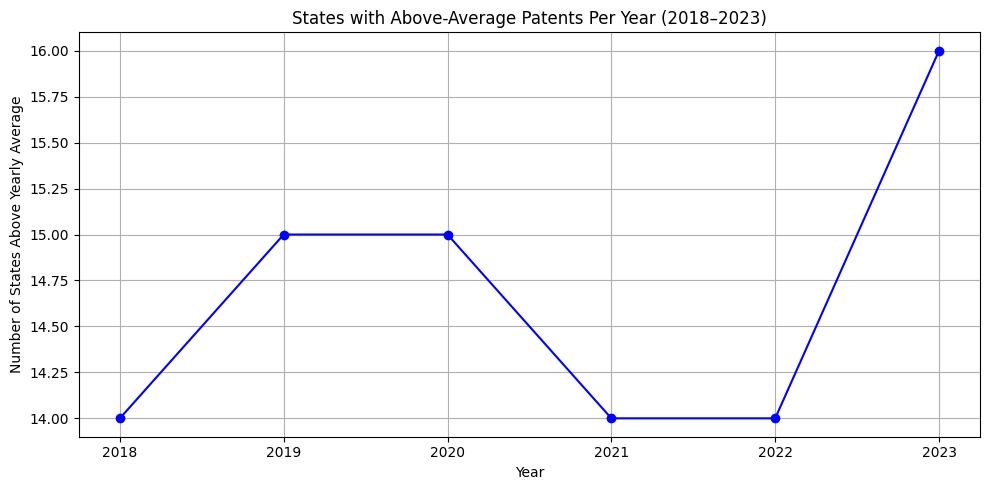

In [31]:
filtered_df = states_above_avg[(states_above_avg['year'] >= 2018) & (states_above_avg['year'] <= 2023)]

print("\nStates Above Yearly Average Patents (2018–2023):\n", filtered_df)

plt.figure(figsize=(10, 5))
plt.plot(filtered_df['year'], filtered_df['states_above_avg'], marker='o', color='blue')
plt.title('States with Above-Average Patents Per Year (2018–2023)')
plt.xlabel('Year')
plt.ylabel('Number of States Above Yearly Average')
plt.grid(True)
plt.tight_layout()
plt.show()

In [32]:
top_n_df = compute_top_n_share(df_filtered, top_n=5)
percent_change_df = compute_percent_change(df_filtered)
states_threshold_df = states_above_avg

In [33]:
top_n_df[:]

,year,top_5_state_share_percent,top_5_states
0,2018,52.44,"CA, TX, NY, MA, WA"
1,2019,53.25,"CA, TX, NY, WA, MA"
2,2020,53.54,"CA, TX, NY, WA, MA"
3,2021,53.61,"CA, TX, NY, WA, MA"
4,2022,53.71,"CA, TX, MA, WA, NY"
5,2023,54.20,"CA, TX, MA, WA, NY"


Top 5 State Share:
    year  top_5_state_share_percent        top_5_states
0  2018                      52.44  CA, TX, NY, MA, WA
1  2019                      53.25  CA, TX, NY, WA, MA
2  2020                      53.54  CA, TX, NY, WA, MA
3  2021                      53.61  CA, TX, NY, WA, MA
4  2022                      53.71  CA, TX, MA, WA, NY
5  2023                      54.20  CA, TX, MA, WA, NY

Percent Change (Pre vs Post COVID):
    disambig_state  pre_avg  post_avg  percent_change
48             VI        7        21      200.000000
14             ID     4340     10013      130.714286
27             MT      762      1483       94.619423
47             VA    13977     24806       77.477284
7              DC     1382      2447       77.062229


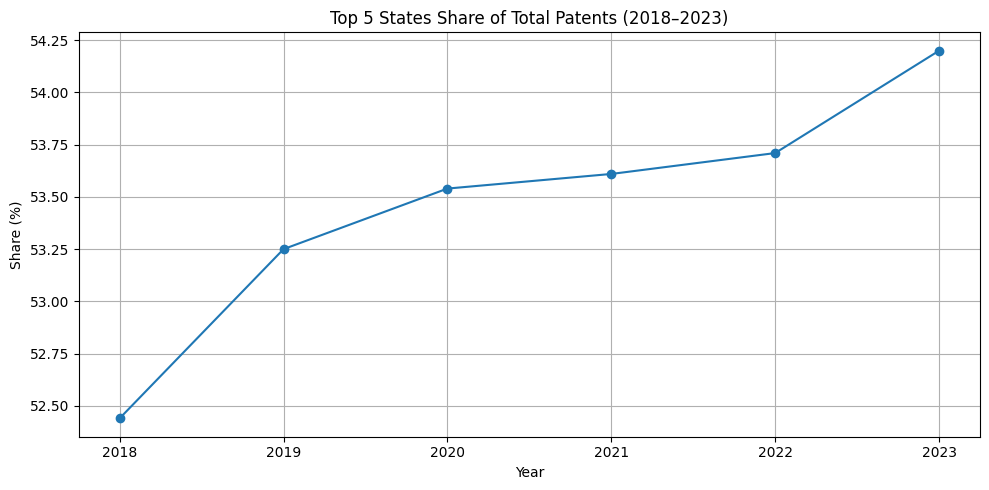

In [34]:
print("Top 5 State Share:\n", top_n_df)
print("\nPercent Change (Pre vs Post COVID):\n", percent_change_df.head())

plt.figure(figsize=(10, 5))
plt.plot(top_n_df['year'], top_n_df['top_5_state_share_percent'], marker='o')
plt.title('Top 5 States Share of Total Patents (2018–2023)')
plt.xlabel('Year')
plt.ylabel('Share (%)')
plt.grid(True)
plt.tight_layout()
plt.show()




In [35]:
top_states_by_year = df.groupby(['year', 'disambig_state']).size().reset_index(name='count')
top_states = []

for year in sorted(df['year'].unique()):
    top = top_states_by_year[top_states_by_year['year'] == year].nlargest(5, 'count')
    top_states.extend(top['disambig_state'].tolist())

# Frequency of appearance in top 5
top_frequency = pd.DataFrame(Counter(top_states).items(), columns=['state', 'appearances'])
top_frequency.sort_values(by='appearances', ascending=False)

,state,appearances
2,CA,48
3,NY,48
5,TX,37
6,MA,28
1,NJ,24
10,WA,17
0,IL,15
4,PA,14
9,MI,7
7,MD,1


# 3. Percent Change in Patent Activity (Pre vs Post COVID)

1. The bar chart below shows the **percent change in patent filings per state** when comparing pre-COVID years (2018–2019) with post-COVID years (2021–2023).  

Each bar represents a U.S. state, and the color intensity indicates the degree of increase or decrease:
- **Green** = strong increase in patent filings  
- **Red** = significant decline in filings  
- **Yellow** = relatively stable or small change

This helps identify which states experienced a surge or drop in innovation activity following the pandemic.

2. This section highlights U.S. states that experienced over 50% growth in patent filings when comparing pre-COVID years (2018–2019) to post-COVID years (2021–2023). These are the states showing significant upward momentum in innovation activity.

3. The summary indicates the statistical values as suggested to be added by a peer in class


In [36]:

fig = px.bar(percent_change_df.sort_values('percent_change', ascending=False),
             x='disambig_state', y='percent_change',
             title='Percent Change in Patent Count per State (Pre vs Post COVID)',
             labels={'percent_change': 'Percent Change (%)'},
             color='percent_change',
             color_continuous_scale='RdYlGn')

fig.update_layout(xaxis={'categoryorder':'total descending'})
fig.show()

In [43]:
high_growth_states = percent_change_df[percent_change_df['percent_change'] > 50]
display(high_growth_states)

,disambig_state,pre_avg,post_avg,percent_change
48,VI,7,21,200.000000
14,ID,4340,10013,130.714286
27,MT,762,1483,94.619423
47,VA,13977,24806,77.477284
7,DC,1382,2447,77.062229
34,NV,3124,5409,73.143406
40,PR,196,335,70.918367
44,TN,6018,10165,68.909937
37,OK,2873,4813,67.525235
43,SD,597,982,64.489112


In [37]:
summary = df.groupby('disambig_state').size().describe()
print(summary)

count    5.600000e+01
mean     1.417145e+05
std      2.974905e+05
min      1.000000e+00
25%      1.212425e+04
50%      4.912950e+04
75%      1.496078e+05
max      2.101519e+06
dtype: float64


# Total Patents File Export
- This file will be used later for the calculation of Hypothesis 3

In [38]:
state_counts = new_merged_df.groupby('disambig_state').size().reset_index(name='patent_count')


In [39]:
print(state_counts)

   disambig_state  patent_count
0              AB         28685
1              AK          1930
2              AL         25834
3              AR         13143
4              AS             1
..            ...           ...
63             WA        374989
64             WI        134070
65             WV          8624
66             WY          4153
67             YT            86

[68 rows x 2 columns]


In [40]:
state_counts.to_csv('./data/total_patents.csv', index=False)
